GD-NLP 5. 워드 임베딩
===

워드 임베딩 벡터를 만드는 다양한 기법에 대해 알아보고 널리 사용되는 Word2Vec, FastText, Glove의 원리와 사용법을 실습을 통해 알아본다.

[ 학습 목차 ]
- 5-1. 벡터화
- 5-2. 벡터화 실습: 원-핫 인코딩 구현해보기
- 5-3. 워드 임베딩
- 5-4. Word2Vec (1) 분포 가설
- 5-5. Word2Vec (2) CBoW
- 5-6. Word2Vec (3) Skip-gram과 Negative Sampling
- 5-7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제
- 5-8. 임베딩 벡터의 시각화
- 5-9. FastText
- 5-10. GloVe

# 5-1. 벡터화

## Bag of words / DTM(Document-Term Matrix)

먼저 Bag of words는 단어의 순서를 고려하지 않고, 단어의 등장 빈도(frequency)만을 고려해서 단어를 벡터화하는 방법입니다. 
- Bag of Words : https://youtu.be/dKYFfUtij_U

Bag of words를 사용하여 문서 간 유사도를 비교하기 위한 행렬을 만들면, 이를 DTM(문서 단어 행렬, Document-Term Matrix)이라고 합니다. 문서를 행으로, 단어를 열로 구성한 행렬이죠.
- 이때, DTM의 문서 벡터나 단어 벡터는 대부분의 값이 0이라는 특징을 가지고 있는데, 이런 벡터를 희소 벡터(sparse vector)라고 합니다.
- 중복 카운트는 배제한 단어들의 집합(set)을 자연어 처리에서는 단어장(vocabulary)이라고 합니다.

## TF-IDF

DTM을 이용해서 문서의 유사도를 비교하는 경우를 생각해 봅시다. 두 문서에서 공통적으로 등장하는 단어가 많으면 그 두 문서는 유사하다고 판단하면 됩니다. 그런데 이 방법은 문제가 있습니다. 별로 중요하지도 않은 단어인데도 모든 문서에서 공통적으로 등장하는 단어가 있다는 것입니다.
  
가령 영어 단어 'the'는 관사로 거의 모든 문서에서 많이 등장하지만 'the'가 등장하는 모든 문서가 유사도가 높다고 할 수는 없죠. 그래서 단어마다 중요 가중치를 다르게 주는 방법인 TF-IDF가 등장했습니다. 

-  TF-IDF : https://youtu.be/meEchvkdB1U

TF-IDF를 사용한다고 하더라도, 여전히 문서 벡터의 크기가 단어장의 크기인 V이고, 문서 벡터와 단어 벡터 둘 다 여전히 희소 벡터라는 겁니다.

## 원-핫 인코딩(one-hot encoding)

모든 단어의 관계를 독립적으로 정의하는 원-핫 인코딩이라는 방식도 있습니다. 원-핫 인코딩을 하기 위해서는 우선 갖고 있는 텍스트 데이터에서 단어들의 집합인 단어장(vocabulary)을 만듭니다. 그 후 단어장에 있는 모든 단어에 대해서 1부터 V까지 고유한 정수를 부여합니다. 이 정수는 단어장에 있는 각 단어의 일종의 인덱스 역할을 합니다. 각 단어는 V차원의 벡터로 표현되는데, 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터가 됩니다.    

숫자 부여에 정해진 규칙은 없지만 관례적으로는 빈도수가 높은 단어들부터 낮은 숫자를 부여해요. 가장 많이 등장하는 단어는 1부터 부여하는 식이죠. 이렇게 하면 아주 큰 정수가 부여된 단어는 빈도수가 아주 낮은 단어라는 뜻이고, 그 단어는 중요하지 않은 단어일 확률이 높습니다. 그러므로 추가적인 전처리로 정수가 아주 큰 숫자는 그냥 단어장에서 제거해버리는 선택을 할 수도 있습니다.     

해당 단어의 정수 위치에만 1의 값을 가지고 나머지 위치에는 0의 값을 가져야 한다는 겁니다. 원-핫 인코딩을 통해 얻은 벡터를 원-핫 벡터(one-hot vector)라고 합니다. 여기서는 정수를 1부터 부여한다고 가정했지만, 실제로는 0번 단어를 사용하기도 하고, 인덱스도 0번부터 시작하기도 한답니다.

* TF(Term Frequency)란 문장을 구성하는 단어들의 원-핫 벡터들을 모두 더해서 문장의 단어 갯수로 나눈 것과 같습니다.

# 5-2. 벡터화 실습: 원-핫 인코딩 구현해보기

## Step 1. 패키지 설치하기

직접 파이썬을 통해서 원-핫 인코딩을 구현해보겠습니다.
    
한국어로 실습하기 위해서 한국어 형태소 분석기 패키지 KoNLPy가 필요한데, cloud 사용자는 이미 설치되어 있으니 명령어만 참고로 알아두세요.
    
- $ pip install konlpy

실습에 필요한 도구들을 임포트합니다.

In [1]:
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


아래와 같이 전처리와 토큰화가 전혀 되어 있지 않은 텍스트가 있다고 해봅시다.

In [2]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

## Step 2. 전처리 이야기

이 텍스트에는' !, ~, . '와 같은 각종 특수문자들이 있습니다. 상황에 따라 다르겠지만, 대개 이런 특수문자들은 자연어 처리에서 큰 의미를 가지지 못합니다. 여기서는 정규 표현식을 사용하여 특수문자들을 제거하고자 합니다.
    
한글과 공백을 제외하고 특수문자만 제거하고 싶다면 어떤 정규 표현식을 사용하면 될까요? 이를 수행하기 위해서는 정규 표현식으로 한국어의 범위를 지정할 수 있어야 합니다. 일반적으로 자음의 범위는 'ㄱ ~ ㅎ', 모음의 범위는 'ㅏ ~ ㅣ'와 같이 지정할 수 있습니다. 해당 범위 내에 어떤 자음과 모음이 속하는지 알고 싶다면 아래의 링크를 참고하시기 바랍니다.
- Hangul Compatibility Jamo : https://www.unicode.org/charts/PDF/U3130.pdf

또한 완성형 한글의 범위는 '가 ~ 힣'과 같이 사용합니다. 해당 범위 내에 포함된 음절들은 아래의 링크에서 확인할 수 있습니다.
- Hangul Syllables : https://www.unicode.org/charts/PDF/UAC00.pdf

이를 응용하면, 한글과 공백을 제외하고 모든 문자를 표현하는 정규 표현식은 결국 아래와 같습니다.
     
- 한글, 공백을 제외한 모든 문자를 표현하는 regex : [^ㄱ-ㅎㅏ-ㅣ가-힣 ]

이 정규 표현식을 반영하여 전처리를 수행해보겠습니다.

In [3]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


- 정상적으로 특수문자가 제거된 것을 볼 수 있습니다!

## Step 3. 토큰화 이야기

단어장을 구성하기 위해서는 단어장의 원소인 토큰(token)이라는 단위를 정해줄 필요가 있습니다. 그리고 한국어는 주로 형태소 분석기를 통해서 토큰 단위를 나눠줍니다. 여기서는 KoNLPy에 내장된 Okt 형태소 분석기를 사용해보겠습니다.
- class konlpy.tag.\_okt.Okt : https://konlpy.org/en/latest/api/konlpy.tag/#okt-class


In [4]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


- okt.morphs() : Parse phrase to morphemes 형태소로 구문 분석 

- 형태소 분석기를 통해 토큰들이 분리가 되었습니다.

## Step 4. 단어장 만들기

이제 이 토큰들을 가지고 단어장을 만들어 볼 텐데요. 여기서는 빈도수가 높은 단어일수록 낮은 정수를 부여하려고 합니다. 빈도수가 높은 순서대로 낮은 정수를 부여하기 위해서 각 단어의 빈도수를 카운트 할 필요가 있겠죠? 여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트해 보겠습니다.
- class collections.Counter() : A Counter is a dict subclass for counting hashable objects     
    https://docs.python.org/3/library/collections.html#collections.Counter

In [5]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


- 단어가 키(key)로, 단어에 대한 빈도수가 값(value)으로 저장되어 있네요. 

vocab에 단어를 입력하면 빈도수를 리턴합니다. '임금님'이 몇 번 등장했는지 빈도수를 출력해 볼까요?

In [6]:
vocab['임금님']

2

- '임금님'이란 단어가 총 2번 등장했네요. 

most_common()는 상위 빈도수를 가진 단어를 주어진 수만큼 리턴합니다. 이를 사용하여 등장 빈도수가 높은 단어들을 원하는 개수만큼 얻을 수 있습니다. 등장 빈도 수 상위 5개의 단어만 단어장으로 저장해 볼게요.

- most_common() : Return a list of the n most common elements and their counts from the most common to the least    
    https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [7]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


- 빈도수 상위 5개의 단어만 남아 있는 것을 확인할 수 있습니다! 

이제 높은 빈도수를 가진 단어일수록 낮은 정수 인덱스를 부여해 볼까요?

In [8]:
word2idx = {word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


- 이제 각 단어에 고유한 정수를 부여하는 작업이 끝났습니다! 이제 word2idx를 최종 단어장으로 사용할게요.

## Step 5: 원-핫 벡터 만들기

이제 원-핫 인코딩을 하는 함수를 만들어 각 단어를 원-핫 벡터로 만들어볼게요. 아래의 함수는 특정 단어와 단어장을 입력하면 해당 단어의 원-핫 벡터를 리턴하는 함수에요.

In [9]:
def one_hot_encoding(word, word2index):
    one_hot_vector = [0]*(len(word2index))
    index = word2index[word]
    one_hot_vector[index-1] = 1
    return one_hot_vector
print("슝=3")

슝=3


해당 함수를 통해 '임금님'이라는 단어의 원-핫 벡터를 얻어보겠습니다.

In [10]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

## 케라스를 통한 원-핫 인코딩(one-hot encoding)

원-핫 인코딩을 지원하는 패키지는 여러 가지가 있는데 여기서는 텐서플로의 케라스 API를 사용해볼 거에요. 우선 필요한 도구들을 임포트 해 보죠. 여기서는 단어장을 만드는 역할을 해주는 케라스 Tokenizer와 원-핫 인코딩을 위한 도구인 to_categorical을 사용합니다.

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

임포트 완료


위에서 예로 들었던 3개의 문서를 text에 저장합니다.

In [12]:
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

케라스 토크나이저를 사용하면 주어진 텍스트로부터 단어장을 만들고, 단어장의 각 단어에 고유한 정수를 맵핑해 줍니다.

In [13]:
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


위의 결과는 각 단어에 고유한 정수가 맵핑되었음을 보여줍니다. 이제 단어장의 크기를 vocab_size라는 변수에 저장해두겠습니다.

- fit_on_texts(text) : Updates internal vocabulary based on a list of texts    
    https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#fit_on_texts

In [14]:
vocab_size = len(t.word_index) + 1
print("슝=3")

슝=3


- vocab_size에 1을 더해주는 이유는 케라스 토크나이저는 각 단어에 고유한 정수를 부여할 때, 숫자 1부터 부여하지만 실제로 자연어 처리를 할 때는 특별 토큰으로 0번 단어로 단어장에 추가로 사용하는 경우가 많기 때문입니다. 주로 0번은 패딩(padding) 작업을 위한 패딩 토큰으로 사용되는데, 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하고 1을 더해서 단어장의 크기를 저장하겠습니다. 이제 vocab_size는 6이 되었습니다.

케라스 토크나이저에 단어장이 저장되었으므로, 단어장에 속한 단어들로 구성된 텍스트 시퀀스는 케라스 토크나이저를 통해 정수 시퀀스로 변환할 수 있습니다.

In [15]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


- 위의 결과는 텍스트 시퀀스가 정수 시퀀스로 변환되는 것을 보여줍니다. 앞에서 강아지는 1번, 고양이는 2번, 컴퓨터는 4번으로 정수가 부여되었습니다.
     
- texts_to_sequences(texts) : Transforms each text in texts to a sequence of integers     
    https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer#texts_to_sequences

이렇게 변환된 정수 시퀀스는 to_categorical()을 사용해 원-핫 벡터의 시퀀스로 변환할 수 있습니다.

In [16]:
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


각 단어가 단어장의 크기인 6차원의 벡터로 변환된 것을 확인할 수 있습니다.

- tf.keras.utils.to_categorical() : Converts a class vector (integers) to binary class matrix    
    https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

# 5-3. 워드 임베딩

## 희소 벡터의 문제점

DTM, TF-IDF, 원-핫 벡터는 단어장의 크기에 영향을 받는 희소 벡터라는 특징을 가지고 있습니다. 원-핫 인코딩의 경우 단어장의 크기가 30,000이라면, 30,000개의 모든 단어 벡터는 각각 30,000 차원의 벡터가 되죠. 그런데 이 벡터들은 하나의 원소만 1이고 29,999개의 원소가 0의 값을 가집니다. 
    
희소 벡터에는 차원의 저주(curse of dimensionality)라는 문제가 있습니다. 같은 정보를 저차원과 고차원에 각각 표현한다고 해 보죠. 저차원에서는 정보의 밀도가 상대적으로 커지지만, 고차원에서는 정보가 흩어지며 밀도가 작아질 거예요. 정보 밀도가 작아지는 것, 즉 차원이 커지는 것과 머신 러닝 모델의 성능에는 어떤 연관 관계가 있습니다.
- 빅데이터: 큰 용량의 역습 – 차원의 저주 (Curse of dimensionality) : http://thesciencelife.com/archives/1001    

원-핫 벡터가 가지는 문제점은 또 있습니다. '강아지'와 '고양이'라는 두 단어의 의미적 유사성이 '강아지'와 '컴퓨터'라는 두 단어의 의미적 유사성보다는 높다고 판단할 수 없습니다. 

벡터 간 유사도를 구하는 방법으로는 대표적으로 내적(inner product)이 있습니다. 임의의 두개의 원-핫 벡터 간 내적(inner product)을 구해보면, 서로 직교(orthogonal)하여 그 값은 0입니다. 이는 모든 원-핫 벡터의 상호 유사도가 0임을 의미하며. 결국 원-핫 벡터를 통해서는 단어 벡터 간 유사도를 구할 수 없음을 의미합니다.

이에 대한 대안으로 '기계가 단어장 크기보다 적은 차원의 밀집 벡터(dense vector)를 학습'하는 워드 임베딩(word embedding)이 제안되었습니다. 이를 통해 얻는 밀집 벡터는 각 차원이 0과 1이 아닌 다양한 실숫값을 가지며, 이 밀집 벡터를 임베딩 벡터(embedding vector)라고 합니다.

## 워드 임베딩(Word Embedding)

앞으로 워드 임베딩을 수행하는 여러 알고리즘을 살펴보게 될 것입니다. 워드 임베딩의 알고리즘들을 살펴보기에 앞서 지금까지 배운 희소 벡터들과 임베딩 벡터의 차이를 아래의 글을 통해서 이해해보겠습니다!
- 워드 임베딩(Word Embedding) : https://wikidocs.net/33520

# 5-4. Word2Vec (1) 분포 가설

- korean word2vec : https://word2vec.kr/search/

위 사이트는 한국어 데이터로 Word2Vec을 학습하여, 학습된 Word2Vec 벡터들로 연산한 결과를 제공하는 사이트입니다. 위 사이트에 가서 '한국 - 서울 + 도쿄'라는 수식을 입력하면, '일본/Noun'이라는 결과가 나옵니다.

- Word2Vec의 메커니즘 : https://youtu.be/sY4YyacSsLc

## 분포 가설(Distributional Hypothesis)

Word2Vec은 앞서 말했듯이 단어를 벡터로 표현하는 방법의 일종으로 저차원으로 이루어져 있고, 단어의 의미를 여러 차원에 분산하여 표현한 벡터입니다.
    
Word2Vec의 핵심 아이디어는 분포 가설(distributional hypothesis)을 따릅니다. 이 가설은 언어학자 존 루퍼트 퍼스(John Rupert Firth)의 다음 인용으로 설명됩니다.

- You shall know a word by the company it keeps(곁에 오는 단어들을 보면 그 단어를 알 수 있다).

이 인용은 어떤 단어들의 의미를 보려면 주변 단어들을 보라는 의미를 내포하고 있습니다. 그렇다면 분포 가설은 어떤 가설인가요?

- 분포 가설 : ‘비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.’

분포 가설에 따르는 Word2Vec은 같이 등장하는 경향이 적은 단어들에 비해 '강아지', '애교, '귀여운'과 같은 단어들을 상대적으로 유사도가 높은 벡터로 만듭니다. 

# 5-5. Word2Vec (2) CBoW

Word2Vec에는 크게 CBoW와 'Skip-gram'라는 두 가지 방법이 있습니다. CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법입니다. 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법입니다. 메커니즘 자체는 거의 동일하기 때문에 CBoW를 이해한다면 Skip-Gram도 손쉽게 이해 가능합니다. 우선 CBoW에 대해서 알아볼까요?

## CBoW(Continuous Bag of words)

- 예문 : "I like natural language processing."

갖고 있는 코퍼스에 위와 같은 문장이 있다고 합시다. CBoW는 중간에 있는 단어를 예측하는 방법이므로 {"i", "like", "language", "processing"}으로부터 "natural"을 예측하는 것은 CBoW가 하는 일입니다. 이때 예측해야 하는 단어 "natural"을 **중심 단어(center word)** 라고 하고, 예측에 사용되는 단어들을 **주변 단어(context word)** 라고 합니다.
    
중심 단어를 예측하기 위해 앞, 뒤로 몇 개의 단어를 볼지를 결정를 결정했다면, 그 범위를 윈도우(window)라고 합니다. 만약 윈도우 크기가 1이고, 예측하고자 하는 중심 단어가 "language"라면 앞의 한 단어인 "natural"과 뒤의 한 단어인 "processing"을 참고합니다. 윈도우 크기가 m일 때, 중심 단어를 예측하기 위해 참고하는 주변 단어의 개수는 2m입니다.

윈도우 크기를 정했다면, 윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 **슬라이딩 윈도우(sliding window)** 라고 합니다. 위의 그림은 윈도우 크기가 1일 때, 하나의 샘플 문장에 대해 데이터셋을 만드는 과정을 보여줍니다. 위 그림에서 슬라이딩 윈도우를 처음부터 끝까지 마친다면 다음과 같은 데이터셋을 얻을 수 있습니다.
- 아래 데이터셋의 형식은 ((주변 단어의 셋), 중심 단어)임을 가정한다.
- ((like), I), ((I, natural), like), ((like, language), natural), ((natural, processing), language), ((language), processing)

이렇게 선택된 데이터셋에서 단어 각각은 원-핫 인코딩되어 원-핫 벡터가 되고, 원-핫 벡터가 CBoW나 Skip-gram의 입력이 됩니다. 자, 이제 CBoW를 시각화한 그림을 볼게요.    

[CBoW] https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html
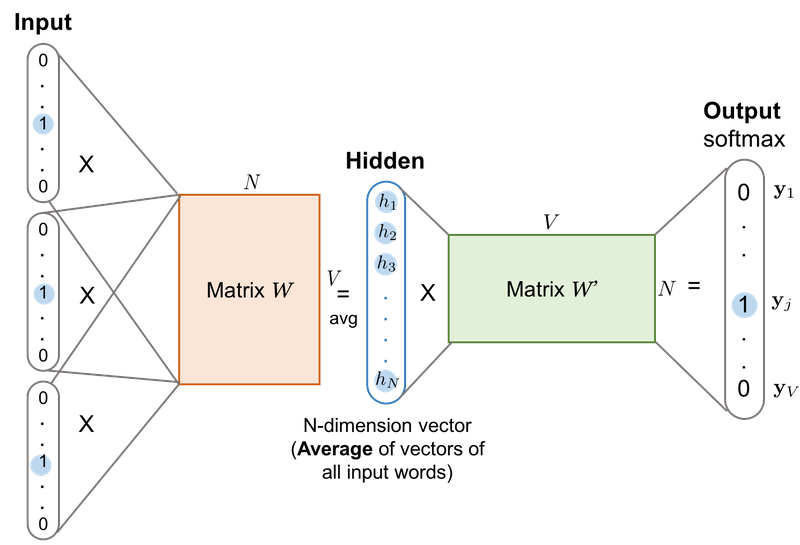 
    
위의 그림은 원-핫 벡터로 변환된 다수의 주변 단어를 이용해 원-핫 벡터로 변환된 중심 단어를 예측할 때의 CBoW의 동작 메커니즘을 보여주고 있습니다. 윈도우 크기가 m이라면 2m개의 주변 단어를 이용해 1개의 중심 단어를 예측하는 과정에서 두 개의 가중치 행렬(matrix)을 학습하는 것이 목적이죠.
     
그림에서 주황색 사각형이 첫 번째 가중치 행렬 W, 초록색 사각형이 두 번째 가중치 행렬 W' 입니다. 두 개의 가중치 행렬이 있다는 것을 인공 신경망 구조에서 보면 CBoW는 입력층, 은닉층, 출력층 이렇게 3개의 층으로만 구성된 인공 신경망이라는 의미입니다. 사실 Word2Vec은 은닉층이 1개라서 딥 러닝이라기보다는 **얕은 신경망(Shallow Neural Network)** 을 학습한다고 볼 수 있겠네요!

CBoW 신경망 구조에서 주변 단어 각각의 원-핫 벡터는 입력층에 위치하고 중심 단어의 원-핫 벡터가 위치한 곳은 출력층이라고 볼 수 있습니다. CBoW에서 사실 입력층과 출력층의 크기는 단어 집합의 크기인 VV로 이미 고정되어 있습니다. (원-핫 벡터로 표현되었기 때문이겠죠?) 하지만 은닉층의 크기는 사용자가 정의해주는 하이퍼파라미터인데요. 여기서는 은닉층의 크기를 NN이라고 해보겠습니다.

우선 입력층에서 은닉층으로 가는 과정을 볼까요?     
[가중치 행렬의 크기 (5 × 4)일 때의 룩업 테이블]https://towardsdatascience.com/what-the-heck-is-word-embedding-b30f67f01c81
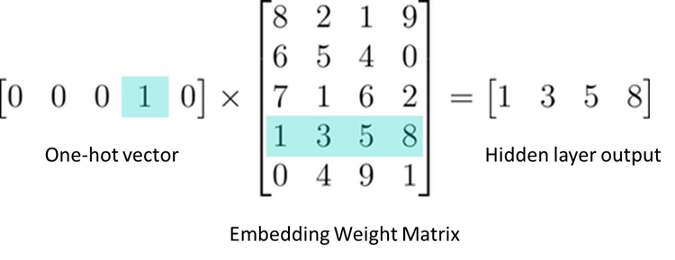

주변 단어로 선택된 각각의 원-핫 벡터는 첫 번째 가중치 행렬과 곱해지게 됩니다. 이때 가중치 행렬의 크기는 (V × N)입니다. 그런데 원-핫 벡터는 각 단어의 정수 인덱스 i에 해당되는 위치에만 1의 값을 가지므로, 원-핫 벡터와 가중치 행렬과의 곱은 가중치 행렬의 i 위치에 있는 행을 그대로 가져오는 것과 동일합니다.
    
이를 마치 테이블에서 값을 그대로 룩업(lookup)해오는 것과 같다고 하여 룩업 테이블(lookup table)이라고 합니다. 위의 그림은 가중치 행렬의 크기가 (5 × 4)일 때의 룩업 테이블을 보여줍니다. 위의 그림에서는 단어장의 크기가 5, 은닉층의 크기가 4일 때를 가정하고 있습니다.    

[은닉층 연산] https://medium.com/@jonathan_hui/nlp-word-embedding-glove-5e7f523999f6    
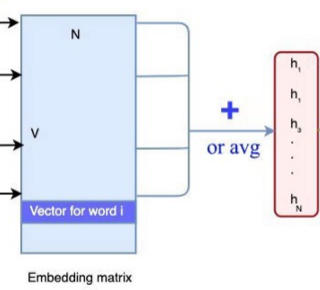

룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가집니다. CBoW에서는 이 벡터들을 모두 합하거나, 평균을 구한 값을 최종 은닉층의 결과로 합니다. 그러면 최종 은닉층의 결과도 N차원의 벡터가 되겠죠. 이게 은닉층 연산의 전부입니다. Word2Vec에서는 은닉층에서 활성화 함수나 편향(bias)을 더하는 연산을 하지 않습니다.
    
Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer)이라고도 합니다.
    
이제 은닉층에서 출력층으로 가는 과정과 출력층의 연산을 보겠습니다.    
[출력층 연산] https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html
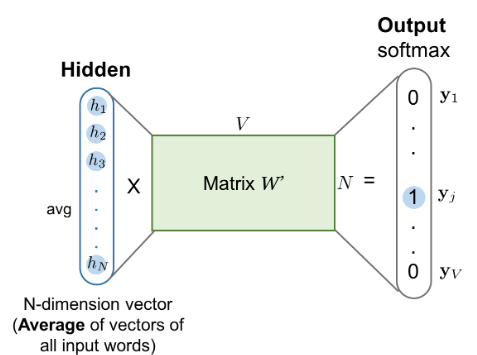    

은닉층에서 생성된 N차원의 벡터는 두 번째 가중치 행렬과 곱해집니다. 이 가중치 행렬의 크기는 (N × V)이므로, 곱셈의 결과로 나오는 벡터의 차원은 V입니다. 출력층은 활성화 함수로 소프트맥스 함수를 사용하므로 이 VV차원의 벡터는 활성화 함수를 거쳐 모든 차원의 총합이 1이 되는 벡터로 변경됩니다.
    
CBoW는 이 출력층의 벡터를 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화하도록 학습시킵니다. 이 과정에서 첫 번째 가중치 행렬 W와 두 번째 가중치 행렬 W'가 업데이트되는데, 학습이 다 되었다면 N차원의 크기를 갖는 W의 행이나 W'의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 때로는 W와 W'의 평균치를 임베딩 벡터로 선택하기도 합니다.

# 5-6. Word2Vec (3) Skip-gram과 Negative Sampling

## Skip-gram

CBoW를 이해했다면 Skip-gram을 이해하는 것은 정말 쉽습니다. 이제 주변 단어로 중심 단어를 예측하는 것이 아니라, 중심 단어로부터 주변 단어를 예측한다는 것이 다른 점이죠.

[슬라이딩 윈도우] https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4
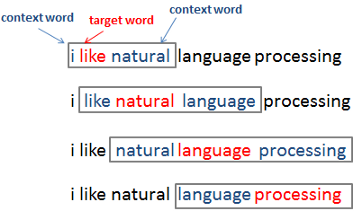

앞서 살펴봤던 그림을 다시 보겠습니다. CBoW의 경우 위 그림에서 슬라이딩 윈도우 방식으로 얻을 수 있는 샘플 수는 5개였습니다. 그런데 Skip-gram은 데이터셋 구성부터 다릅니다. 중심 단어로부터 주변 단어 각각을 예측하기 때문입니다. 위 그림으로부터 얻을 수 있는 Skip-gram의 데이터셋은 아래와 같습니다.
    
- 아래 데이터셋의 형식은 (중심 단어, 주변 단어)임을 가정합니다.
- (i, like) (like, I), (like, natural), (natural, like), (natural, language), (language, natural), (language, processing), (processing, language)    

Skip-gram을 시각화한 그림은 다음과 같습니다.   
[Skip-gram] https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html
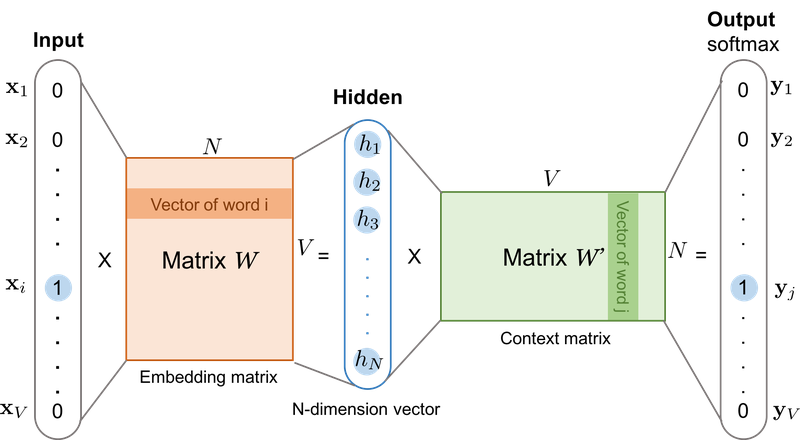

중심 단어로부터 주변 단어를 예측한다는 점, 그리고 이로 인해 중간에 **은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없어졌다** 는 점만 제외하면 CBoW와 메커니즘 자체는 동일합니다. skip-gram도 CBoW와 마찬가지로 학습 후에 가중치 행렬 W의 행 또는 W'의 열로부터 임베딩 벡터를 얻을 수 있습니다.

## 네거티브 샘플링(negative sampling)

대체적으로 Word2Vec를 사용할 때는 **SGNS(Skip-Gram with Negative Sampling)** 을 사용합니다. 즉 Skip-gram을 사용하면서 **네거티브 샘플링(Negative Sampling)** 이란 방법도 사용한다는 거죠! 앞서 배운 Word2Vec의 구조는 연산량이 지나치게 많아 실제로 사용하기 어렵거든요.     

Skip-gram의 학습 과정을 살펴봅시다. 모델 구조는 단순해 보이지만 복잡한 과정을 거칩니다. 출력층에서 소프트맥스 함수를 통과한 V차원의 벡터와 레이블에 해당되는 V차원의 주변 단어의 원-핫 벡터와의 오차를 구하고, 역전파를 통해 모든 단어에 대한 임베딩 벡터을 조정합니다. 그 단어가 중심 단어나 주변 단어와 전혀 상관없는 단어라도요. 만약 단어장의 크기가 수십, 수백만에 달한다면 이 작업은 너무너무 느립니다! Output을 위한 소프트맥스(Softmax) 함수의 분모항이 수백만에 달하는 것만 생각해 보아도 충분히 예상할 수 있습니다.    

연관 관계가 없는 단어들의 임베딩 값을 굳이 업데이트할 필요가 없겠죠? 그래서 네거티브 샘플링은 연산량을 줄이기 위해서 소프트맥스 함수를 사용한 V개 중 1개를 고르는 **다중 클래스 분류 문제** 를 **시그모이드 함수를 사용한 이진 분류 문제** 로 바꾸기로 합니다.     
[Skip-gram] http://jalammar.github.io/illustrated-word2vec/
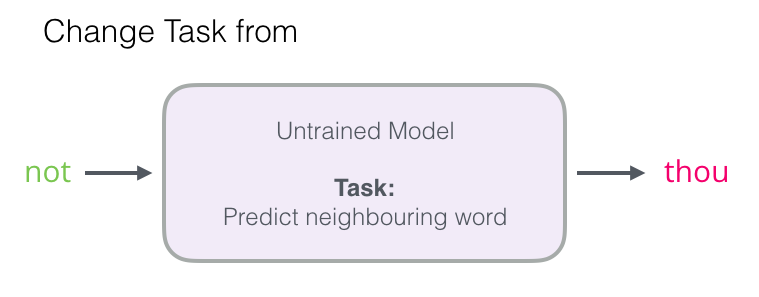

기존의 skip-gram은 위의 그림과 같이 중심 단어로부터 주변 단어를 예측하는 방식이었습니다. 그런데 네거티브 샘플링을 사용하면 이렇게 바뀝니다!
     
[네거티브 샘플링] http://jalammar.github.io/illustrated-word2vec/
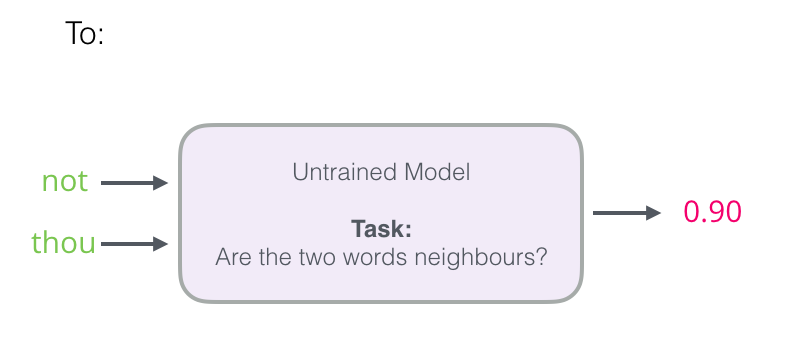

중심 단어와 주변 단어를 입력값으로 받아 이 두 단어가 정말로 이웃 관계면(실제로 중심 단어와 주변 단어의 관계면) 1을 또는 0을 출력하는 문제로 바꾸는 것지요. 즉, 기존의 다중 분류 문제에서 이진 분류 문제로 바뀐 것입니다.
     
[정상적인 데이터셋에는 1이라는 레이블을 달아줍니다.] http://jalammar.github.io/illustrated-word2vec/
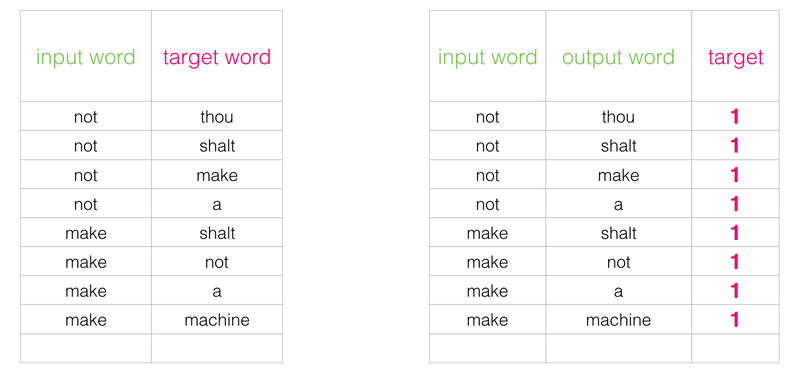

우선 슬라이딩 윈도우를 통해서 만들어진 정상적인 데이터셋에는 1이라는 레이블을 달아줍니다.    
위 그림에서 좌측은 기존의 데이터셋, 우측은 기존 데이터셋에 1로 레이블링을 해주었습니다. 1로 레이블링해 주었다는 것은 0으로 레이블링을해 주는 경우도 있어야겠죠. 0으로 레이블링 해주는 경우는 실제로 이웃 관계(중심 단어와 주변 단어)가 아닌 경우입니다.
    
**랜덤으로 단어장에 있는 아무 단어나 가져와 target word로 하는 거짓 데이터셋을 만들고 0으로 레이블링** 을 해주는 것이죠! 거짓(negative) 데이터셋을 만들기 때문에 이 방법이 **네거티브 샘플링**이라 불립니다. 아래의 그림은 거짓 데이터셋을 만드는 과정을 보여줍니다.
    
[거짓 데이터셋을 만드는 과정] http://jalammar.github.io/illustrated-word2vec/
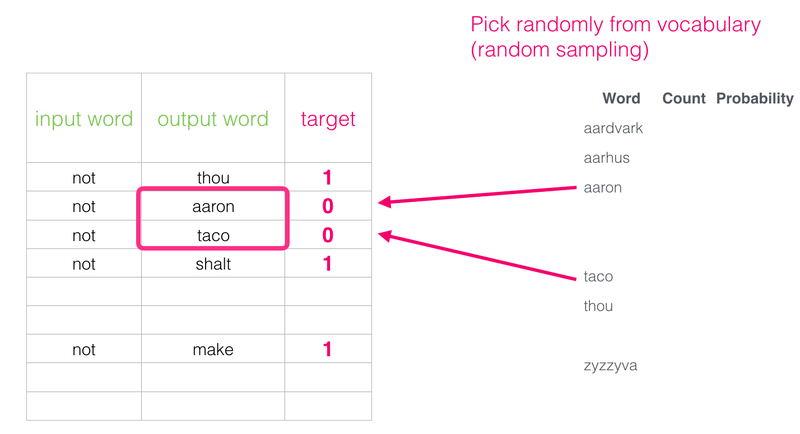
    
이렇게 완성된 데이터셋으로 학습하면 Word2Vec은 더 이상 다중 클래스 분류 문제가 아니라 이진 분류 문제로 간주할 수 있습니다. 중심 단어와 주변 단어를 내적하고, 출력층의 시그모이드 함수를 지나게 하여 1 또는 0의 레이블로부터 오차를 구해서 역전파를 수행합니다. 
     
[내적, 시그모이드 함수, 오차, 역전파] http://jalammar.github.io/illustrated-word2vec/
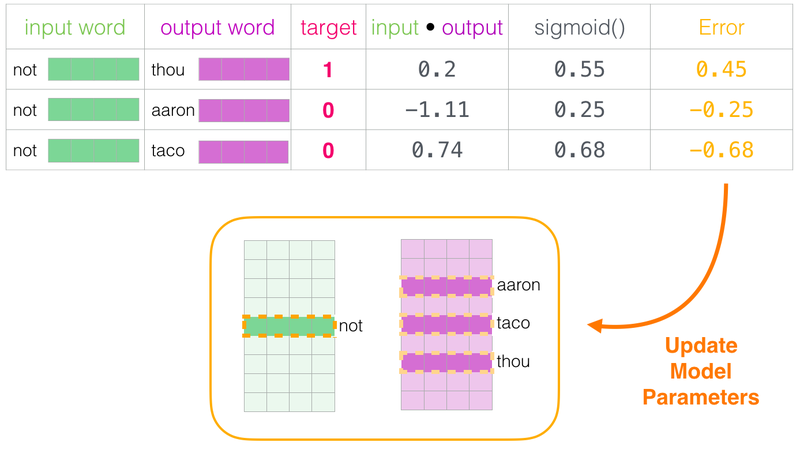

이런 학습 방식은 기존의 소프트맥스 함수를 사용했던 방식보다 상당량의 연산량을 줄일 수 있는 효과를 가지고 있습니다! 이 아이디어는 엄청난 연산량을 필요로 했던 Word2Vec의 학습이 가능케 했던 핵심적인 아이디어 중 하나입니다. 다양한 분야에 손쉽게 응용할 수 있는 매력적인 아이디어이므로 잘 알아둡시다.

# 5-7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제

## 영어 Word2Vec 실습

영어 데이터를 다운로드받아 직접 Word2Vec을 훈련시켜보겠습니다. Word2Vec을 별도로 구현할 필요없이 파이썬의 gensim 패키지를 통해 이미 구현된 Word2Vec 모델을 사용할 수 있습니다. 여기서 사용할 훈련 데이터는 NLTK에서 제공하는 코퍼스이며, gensim 패키지는 토픽 모델링을 위한 NLP 패키지입니다.
     
- $ pip install nltk    

- $ pip install gensim

NLTK에 내장된 코퍼스를 다운로드합니다. NLTK 코퍼스는 다른 프로젝트에서도 사용할 수 있으므로 프로젝트 디렉토리가 아닌, 기본 디렉토리에 설치하겠습니다.

In [17]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

NLTK의 코퍼스를 불러와 corpus라는 변수에 저장합니다.



In [18]:
from nltk.corpus import abc
corpus = abc.sents()
print("슝~")

슝~


- nltk.corpus : Corpus reader functions are named based on the type of information     
    sents(): list of (list of str)    
    https://www.nltk.org/api/nltk.corpus.html
    
코퍼스가 정상적으로 로딩되었는지 확인하기 위해 3개의 샘플만 출력해 봅시다.

In [19]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


해당 코퍼스의 크기를 확인해 보겠습니다.

In [20]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


약 29,000개의 샘플이 존재하네요! 이 코퍼스를 가지고 Word2Vec을 훈련시켜 보겠습니다.

In [21]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


모델 학습 완료!


위 코드에서 각 파라미터가 의미하는 바는 아래와 같습니다.
- vector size = 학습 후 임베딩 벡터의 차원
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
- workers = 학습을 위한 프로세스 수
- sg : 0은 CBoW, 1은 Skip-gram. 

gensim.models.Word2Vec() : https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec

    
아주 잠깐의 기다림 끝에 Word2Vec의 학습이 완료됩니다. Word2Vec는 입력한 단어에 대해서 가장 코사인 유사도가 높은 단어들을 출력하는 model.wv.most_similar를 지원합니다. 'man'과 가장 유사한 단어들은 어떤 단어들일까요?

In [22]:
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9233418107032776), ('skull', 0.911030113697052), ('Bang', 0.905648946762085), ('asteroid', 0.9052114486694336), ('third', 0.9020071625709534), ('baby', 0.8994219303131104), ('dog', 0.898607611656189), ('bought', 0.8975202441215515), ('rally', 0.8912495374679565), ('disc', 0.8889137506484985)]


- gensim.models.Word2Vec.most_similar() : Find the top-N most similar words     
    topn=10 (default)    
    https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

일반적으로 더 많은 훈련 데이터를 사용하면 사용할수록 더 좋은 성능을 얻을 수 있답니다. 자, 이렇게 공들여 학습한 모델을 저장해두었다가 필요할 때 로드하면 더욱 좋겠죠? 이번에는 모델을 저장하고 로드하는 방법을 배워보겠습니다.

In [23]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/GoingDeeper/nlp5/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/GoingDeeper/nlp5/w2v")
print("모델  load 완료!")

모델  load 완료!


- gensim.models.Word2Vec.save_word2vec_format() : Store the input-hidden weight matrix in the same format used by the original C word2vec-tool, for compatibility.    
    https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.save_word2vec_format.html#gensim.models.Word2Vec.save_word2vec_format 
- gensim.models.Word2Vec.load_word2vec_format() : Load the input-hidden weight matrix from the original C word2vec-tool format     
    https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.load_word2vec_format.html#gensim.models.Word2Vec.load_word2vec_format
    
    
현재 loaded_model에는 저장되었던 모델이 다시 로드된 상태입니다. 로드한 모델이 이전과 동일한 결과를 출력하는지 테스트해 보겠습니다.

In [24]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.9233418107032776), ('skull', 0.911030113697052), ('Bang', 0.905648946762085), ('asteroid', 0.9052114486694336), ('third', 0.9020071625709534), ('baby', 0.8994219303131104), ('dog', 0.898607611656189), ('bought', 0.8975202441215515), ('rally', 0.8912495374679565), ('disc', 0.8889137506484985)]


앞서 테스트한 결과와 동일한 결과가 나오는 것을 확인할 수 있습니다.

## Word2Vec의 OOV 문제

Word2Vec은 Bag of words 학습 과정에서 언급되었던 문제인 사전에 없는 단어(Out Of Vocabuary) 문제를 그대로 가지고 있습니다. 다시 말해, 사전에 없는 단어에 대해서 Word2Vec은 임베딩 벡터값을 얻을 수 없습니다. 학습된 모델에 모르는 단어를 입력하면 어떻게 될까요?
    
"overacting"은 과장된 행동을 나타내는 단어입니다. 사실 자주 등장하는 단어는 아닌데요. overacting과 코사인 유사도가 가장 높은 단어를 출력해 볼까요?

In [25]:
# 에러가 나더라도 놀라지 마세요.
loaded_model.most_similar('overacting')

KeyError: "Key 'overacting' not present"

"overacting"은 훈련 데이터에 없는 단어, 다시 말해 단어장에 존재하지 않는 단어므로 이 코드는 에러를 발생시킵니다. 에러 문구를 해석해보면 "단어 'overacting'은 단어장에 없습니다." 라는 의미죠. 없는 단어에 대해서 임베딩 벡터값을 얻을 수는 없으니까요.
    
이번에는 잘 등장하지 않아 훈련 데이터에 없는 단어라기보다는 오타가 발생했을 경우를 가정해보겠습니다. 테스트 데이터에 하필 단어 'memory'의 오타인 'memorry'라는 단어가 있었던 상황을 가정해보는 것이죠. 훈련 데이터에는 당연히 'memorry'가 등장한 적이 없었을 테고, 그렇다면 Word2Vec은 'memorry'의 임베딩 벡터값을 모델에 전달할 수 있었을까요?
    
답은 '아니오'입니다. Word2Vec은 'memorry'에 대해서 임베딩 벡터값을 훈련하지 않았거든요. 훈련된 Word2Vec 모델에 'memorry'를 넣어보겠습니다.

In [26]:
loaded_model.most_similar('memorry')

KeyError: "Key 'memorry' not present"

당연히 되지 않습니다. 이유는 동일합니다. 단어장에 없는 단어였으니까요.

# 5-8. 임베딩 벡터의 시각화

이번에는 구글이 공개한 임베딩 벡터의 시각화 오픈소스인 임베딩 프로젝터(embedding projector)를 사용해서 임베딩 벡터들을 시각화해 보겠습니다. 임베딩 프로젝터를 통해서 어떤 임베딩 벡터들이 가까운 거리에 군집이 되어 있고, 특정 임베딩 벡터와 유클리드 거리나 코사인 유사도가 높은지 확인할 수 있습니다!

## 필요한 파일 만들기

임베딩 프로젝터를 통해서 임베딩 벡터를 시각화하기 위해서는 이미 저장된 모델이 필요해요. 이미 저장된 모델로부터 벡터값이 저장된 파일과 메타파일을 얻어야 하거든요. 앞서 'w2v'란 이름으로 모델을 저장했었죠? 아래 커맨드를 실행해 보겠습니다.
- 참고 Word2vec embeddings : https://radimrehurek.com/gensim/models/word2vec.html

In [27]:
!python -m gensim.scripts.word2vec2tensor --input ~/aiffel/GoingDeeper/nlp5/w2v --output ~/aiffel/GoingDeeper/nlp5/w2v

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
2021-12-14 07:52:00,666 - word2vec2tensor - INFO - running /opt/conda/lib/python3.7/site-packages/gensim/scripts/word2vec2tensor.py --input /aiffel/aiffel/GoingDeeper/nlp5/w2v --output /aiffel/aiffel/GoingDeeper/nlp5/w2v
2021-12-14 07:52:00,666 - keyedvectors - INFO - loading projection weights from /aiffel/aiffel/GoingDeeper/nlp5/w2v
2021-12-14 07:52:01,836 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (10363, 100) matrix of type float32 from /aiffel/aiffel/GoingDeeper/nlp5/w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-14T07:52:01.830393', 'gensim': '4.0.1', 'python': '3.7.9 | packaged by conda-forge

- 해당 커맨드를 수행하면 두 개의 파일이 ~/aiffel/GoingDeeper/nlp5 경로에 생성되는데, w2v_metadata.tsv와 w2v_tensor.tsv 파일입니다. 이 두 개의 파일을 인터넷 환경에 업로드 할 수 있도록 준비해주세요.(클라우드 사용자는 cloud jupyter 열기을 사용하여 다운로드해주세요.)

## 임베딩 프로젝터에 tsv 파일 업로드하기

이제 아래의 링크로 이동하겠습니다.
- https://projector.tensorflow.org/     

임베딩 프로젝터 사이트는 좌측 상단을 통해 데이터를 업로드하고, 시각화 결과를 중앙에서 볼 수 있으며, 우측에서 거리나 유사도에 대한 파라미터를 조작할 수 있는 구조입니다.     
 
우측에 Search 버튼 또는 그래프의 포인트를 클릭해 원하는 단어를 선택하고, neighbors에 몇 개까지의 이웃을 검색할지 선택합니다. distance에서 COSINE 또는 EUCLIDEAN을 통해서 거리 측정 메트릭을 코사인 유사도로 할 것인지, 유클리드 거리로 할 것인지 선택할 수 있습니다. 그 외에도 중앙에 있는 화면에 마우스를 통해서 화면을 돌려보며 임베딩 벡터들의 군집을 확인해보세요!


# 5-9. FastText

페이스북에서 개발한 **FastText**는 Word2Vec 이후에 등장한 워드 임베딩 방법으로, 메커니즘 자체는 Word2Vec을 그대로 따르고 있지만, **문자 단위 n-gram(character-level n-gram) 표현을 학습한다**는 점에서 다릅니다.     

Word2Vec은 단어를 더 이상 깨질 수 없는 단위로 구분하는 반면, FastText는 **단어 내부의 내부 단어(subwords)들을 학습한다**는 아이디어를 가지고 있습니다.



FastText의 n-gram에서 n은 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터입니다.     

n을 3으로 잡은 트라이그램(tri-gram)의 경우, 단어 "partial"은 'par', 'art', 'rti', 'tia', 'ial'로 분리하고 이들을 벡터로 만듭니다. 더 정확히는 시작과 끝을 의미하는 <,>를 도입하여 <pa, art, rti, tia, ial, al>라는 6개의 내부 단어(subword) 토큰을 벡터로 만듭니다. 여기에 추가적으로 하나를 더 벡터화하는데, 기존 단어에 <, 와 >를 붙인 토큰 <partial>입니다.

즉 n = 3인 경우, FastText는 단어 partial에 대해 임베딩되는 n-gram 토큰들은 다음과 같습니다.
- <pa, art, rti, tia, ial, al>, \<partial\>

실제 사용할 때는 n의 최솟값과 최댓값으로 범위를 설정할 수 있는데, gensim 패키지에서는 기본값으로 각각 3과 6으로 설정되어 있습니다.    
    
여기서 내부 단어들을 벡터화한다는 의미는 저 단어들 각각에 대해서 Word2Vec을 수행한다는 의미입니다. 최종적으로 이렇게 벡터화된 n-gram 벡터들의 총합을 해당 단어의 벡터로 취합니다.
    
#각 원소는 벡터임을 가정함    
partial = <pa + art + rti + ita + ial + al> + <par + arti + rtia + tial + ial> + <part + ...중략...  + \<partial\>


## FastText의 학습 방법

사실 FastText의 학습 방식은 Word2Vec와 크게 다르지 않습니다. FastText도 Word2Vec과 마찬가지로 네거티브 샘플링을 사용하여 학습합니다. "(중심 단어, 주변 단어)"의 쌍을 가지고 이 쌍이 포지티브인지 네거티브인지 예측을 진행하는 것이죠. 다만, Word2Vec과 다른 점은 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점입니다.

## OOV와 오타에 대한 대응

FastText는 Word2Vec과 달리 OOV와 오타에 강건하다)robust)는 특징이 있습니다. 이는 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재하면 이로부터 벡터값을 얻는다는 원리에 기인합니다. 실습을 통해 정말로 강건한지 확인해볼까요?
    
Word2Vec에서 사용했던 동일한 훈련 데이터를 corpus에 저장했다고 가정합시다. 이를 가지고 FastText를 학습해 볼게요.

In [28]:
from gensim.models import FastText
fasttext_model = FastText(corpus, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

FastText 학습 완료!


- models.fasttext() : https://radimrehurek.com/gensim/models/fasttext.html

조금만 기다리면 FastText가 훈련됩니다.
    
이제 Word2Vec에서 에러가 발생했던 단어들을 FastText 모델에 입력해 보겠습니다. 단어 'overacting'과 코사인 유사도가 가장 높은 단어는 어떤 단어들일까요?

In [29]:
fasttext_model.wv.most_similar('overacting')

[('resolving', 0.9385820627212524),
 ('fluctuating', 0.936432957649231),
 ('emptying', 0.9330856800079346),
 ('malting', 0.9321697354316711),
 ('overwhelming', 0.932157039642334),
 ('shooting', 0.9303298592567444),
 ('extracting', 0.929929256439209),
 ('debilitating', 0.9296425580978394),
 ('declining', 0.9285975694656372),
 ('mounting', 0.9281109571456909)]

'overacting'이 단어장에 없던 단어임에도 정상적으로 임베딩 벡터값이 계산되어 유사 단어 10개를 출력하는 것을 볼 수 있습니다. 이는 오타를 가정한 단어 'memoryy'에서도 마찬가지입니다.

In [30]:
fasttext_model.wv.most_similar('memoryy')

[('memory', 0.9459690451622009),
 ('mechanisms', 0.8668307662010193),
 ('musical', 0.8667638301849365),
 ('mechanism', 0.8636399507522583),
 ('basic', 0.8597825169563293),
 ('mechanical', 0.8540359735488892),
 ('imagine', 0.8526592254638672),
 ('technical', 0.8492709994316101),
 ('intelligence', 0.8388040661811829),
 ('visual', 0.8346027135848999)]

memoryy와 가장 유사한 단어로 memory가 출력이 되네요!

## 한국어에서의 FastText

한국어도 당연히 FastText 방식으로 학습시킬 수 있습니다. 영어의 경우 문자, 즉 알파벳 단위가 n-gram이었다면 한국어의 경우에는 음절 단위라고 볼 수 있겠네요.

### (1) 음절 단위 FastText
n = 3일때, 단어 '텐서플로우'의 트라이그램 벡터들은 어떻게 구성될까요?

- <텐서, 텐서플, 서플로, 플로우, 로우>, <텐서플로우>    

한국어에서 FastText가 빛을 발하는 것은 사실 음절 단위라기보다는 자소 단위인 경우입니다. 한국어의 자소를 각각의 문자로 간주한 경우에 FastText는 꽤 잘 동작한다고 알려져 있습니다.

### (2) 자소 단위 FastText

단어에 대해서 초성, 중성, 종성을 분리한다고 하고, 종성이 존재하지 않는 경우에는 \_라는 토큰을 대신 사용한다면 어떨까요? n = 3일 때, 단어 '텐서플로우'는 다음과 같이 트라이그램 벡터들로 분리할 수 있습니다. 
- <ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, ...중략... >

- 한국어를 위한 어휘 임베딩의 개발 -2- : https://brunch.co.kr/@learning/8 

# 5-10. GloVe

글로브(Global Vectors for Word Representation, GloVe)는 2014년에 미국 스탠포드 대학에서 개발한 워드 임베딩 방법론입니다. 워드 임베딩의 두 가지 접근 방법인 카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다는 것이 특징입니다.
      
- 카운트 기반 방법이라는 것은 어떤 의미일까요? 앞서 단어의 빈도를 수치화한 방법인 DTM을 배웠었죠. DTM의 경우에는 단어 간 유사도를 반영할 수 없을 뿐만 아니라, 대부분의 값이 0인 희소 표현이라는 특징이 있었습니다. DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩 하는 방법이 LSA(Latent Semantic Analysis)입니다.

## 잠재 의미 분석(LSA, Latent Semantic Analysis)

잠재 의미 분석에 대해서는 아래의 링크를 통해 정리해보겠습니다.
- SVD와 PCA, 그리고 잠재의미분석(LSA) : https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
- 잠재의미분석 (LSA - Latent Semantic Analysis) : https://youtu.be/GVPTGq53H5I

LSA를 요약하면 **DTM에 특잇값 분해를 사용하여 잠재된 의미를 이끌어내는 방법론**입니다. 그 결과의 행벡터를 사용해서 임베딩 벡터를 얻을 수도 있지요. LSA는 단어를 카운트해서 만든 DTM을 입력으로 하므로 카운트 기반의 임베딩 방법이라고 볼 수 있는데, 이 방법은 몇 가지 한계가 있었습니다.
    
(1) 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 새로 차원 축소를 해야 한다.     
(2) 단어 벡터간 유사도를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다.
     
반면, LSA와 대조되는 방법으로 예측 기반의 방법은 Word2Vec과 같은 방법을 말합니다. Word2Vec은 인공 신경망이 예측한 값으로부터 실제 레이블과의 오차를 구하고, 손실 함수를 통해서 인공 신경망을 학습하는 방식이었죠. GloVe 연구진은 Word2Vec의 경우에는 LSA보다 단어 벡터 간 유사도를 구하는 능력은 뛰어나지만, LSA처럼 코퍼스의 전체적인 통계 정보를 활용하지는 못한다는 점을 한계로 지적했습니다. 그리고는 카운트 기반과 예측 기반을 모두 사용하여 Word2Vec보다 더 나은 임베딩 방법을 제안하였는데, GloVe가 그 주인공입니다. 하지만 경험적으로 봤을 때, GloVe가 Word2Vec보다 반드시 뛰어나다고 장담하기는 어렵고, Word2Vec에 거의 준하는 성능을 보여준다고 평가되고 있습니다.

## 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

GloVe를 이해하기 위해서는 윈도우 기반 동시 등장 행렬의 정의에 대해서 이해할 필요가 있습니다. 다음과 같이 3개의 문장이 있는 코퍼스가 있다고 해봅시다.

Example corpus:
- I like deep learning.
- I like NLP.
- I enjoy flying.

이로부터 만들어진 동시 등장 행렬(Co--occurence Matrix)은 다음과 같습니다.
     
[윈도우 크기 1인 동시 등장 행렬] http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf
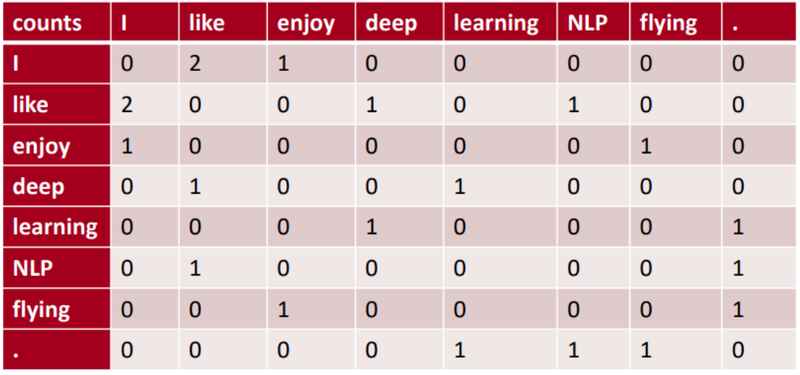

윈도우 기반 동시 등장 행렬은 행과 열을 전체 단어장(vocabulary)의 단어들로 구성하고, 어떤 i 단어의 윈도우 크기(window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬입니다. 위의 경우에는 윈도우 크기를 1로 하였습니다. 이러한 동시 등장 행렬은 전치(transpose)해도 동일한 행렬이 된다는 특징을 가지고 있습니다.

## 동시 등장 확률(Co-occurrence Probability)

동시 등장 행렬에 대해서 이해했다면, 동시 등장 확률에 대해서 이해해봅시다. 동시 등장 확률 P (k|i)P(k∣i)는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률입니다. 이때 i를 중심 단어(center word), k를 주변 단어(context word)라고 합니다.
    
[동시 등장 확률표] http://web.stanford.edu/class/cs224n/slides/cs224n-2019-lecture02-wordvecs2.pdf
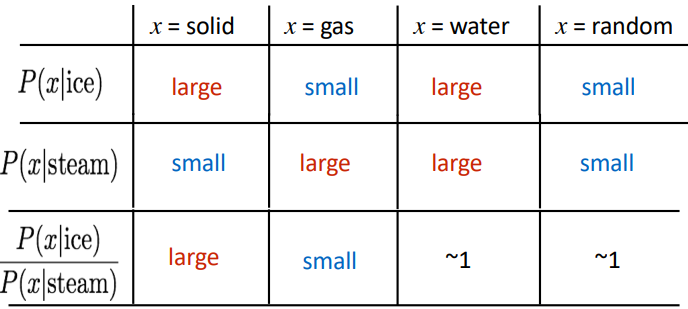

위 동시 등장 확률 표는 실제 GloVe 논문에 제시되었던 표입니다. 위의 표를 통해 알 수 있는 사실은 ice가 등장했을 때 solid가 등장할 확률은 large인 반면, steam이 등장했을 때 solid가 등장할 확률은 small이라는 점입니다. 이는 solid는 '단단한'이라는 의미를 가졌으니까 '증기'라는 의미를 가지는 steam보다는 당연히 '얼음'이라는 의미를 가지는 ice라는 단어와 더 자주 등장하기 때문입니다.
     
P(solid∣steam) / P(solid∣ice) 를 계산한 값은 1보다는 매우 큰 값입니다. 그 이유는 P(solid | ice) 값은 크고, P(solid | steam)의 값은 작기 때문입니다.

## GloVe의 손실 함수 설계하기

GloVe는 동시 등장 행렬로부터 계산된 동시 등장 확률을 이용해 손실 함수를 설계합니다. 동시 등장 행렬을 사용하고 있으니 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이면서, 손실 함수를 통해 모델을 학습시키므로 '예측 기반'의 방법론이라고 할 수 있는 것이죠.
    
GloVe의 아이디어를 한 줄 요약하면 다음과 같습니다.

- 중심 단어 벡터와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 빈도의 로그값이 되도록 만드는 것
- 전체 코퍼스에서의 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값의 차이가 최소화되도록 두 벡터의 값을 학습하는 것
     
사실 내적이라는 것은 두 단어의 유사도를 측정하는 메트릭 중 하나이기 때문에, 이를 동시 등장 확률 또는 빈도와 연관 지어서 값을 학습한다는 것이 GloVe의 아이디어라고 볼 수 있겠습니다.
      
이때, GloVe의 손실 함수는 다음과 같습니다.

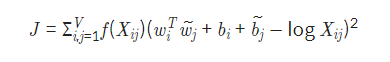
 
위 수식에서 우측의 괄호를 보면 중심 단어와 주변 단어 벡터의 내적이 동시 등장 빈도의 로그값과의 차이를 줄이도록 설계되었음을 볼 수 있습니다. 그런데 중심 단어 ii가 등장했을 때, 윈도우 내 주변 단어 j가 등장하는 횟수인 X ij를 입력으로 하는 함수 f(Xij)항은 무슨 의도일까요?
    
GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 f(Xij)이 굉장히 낮은 경우에는 거의 도움이 되지 않는 정보라고 판단했습니다. 그래서 이에 대한 가중치를 주기 위해서 GloVe 연구진이 선택한 것은 바로 f(Xij)의 값에 영향을 받는 **가중치 함수(Weighting function)** 를 도입하는 것입니다. 하지만 f(Xij) 가 큰 값일 때 지나친 가중치를 주지 않기 위해 함수의 최댓값이 1로 정해져 있습니다. 이는 'It is'와 같은 불용어의 동시 등장 빈도수가 높을 때 지나친 가중을 주지 않기 위함입니다.

## GloVe 실습

파이썬 환경에서 GloVe를 사용하기 위해서는 glove_python_binary이라는 패키지를 설치합니다. 터미널에서 아래의 명령어를 실행하세요.

- \$ pip install glove_python_binary
- \$ pip install nltk    

NLTK에서 제공하는 영화 리뷰 데이터를 다운로드해 corpus 변수에 저장합니다.

In [31]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /aiffel/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.corpus import movie_reviews
corpus=movie_reviews.sents()

print(len(corpus))

71532


해당 코퍼스는 약 71,000개의 샘플이 존재합니다. 이 코퍼스로 GloVe를 훈련시키는 방법은 아래와 같습니다.

In [34]:
from glove import Corpus, Glove

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
emb = Corpus() 
emb.fit(corpus, window=5)

# 벡터의 차원은 100, 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(emb.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(emb.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [38]:
print(emb)

- GloVe - Global Vectors for Word Representation : https://nlp.stanford.edu/projects/glove/
    
총 20에포크를 기다리면 GloVe가 훈련됩니다. man, fiction과 유사한 단어들을 확인하려면 아래와 같은 코드를 실행시키면 됩니다.

In [35]:
model_result1 = glove.most_similar("man")
model_result2 = glove.most_similar("fiction")

print("model_result1", model_result1)
print("model_result2", model_result2)

model_result1 [('woman', 0.9571645965913822), ('girl', 0.8971644454011874), ('young', 0.8906096242925435), ('boy', 0.8829257599227645)]
model_result2 [('science', 0.9823155484488306), ('pulp', 0.9654960400814799), ('kong', 0.7703084293985646), ('hong', 0.7390165875871667)]
